# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from matplotlib import style
from matplotlib.cm import ScalarMappable

In [ ]:
import networkx as nx

# Load the dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/IR_A3/soc-sign-bitcoinalpha.csv.gz',  compression='gzip',header=None,error_bad_lines=False)

In [ ]:
dataset

,0,1,2,3
0,7188,1,10,1407470400
1,430,1,10,1376539200
2,3134,1,10,1369713600
3,3026,1,10,1350014400
4,3010,1,10,1347854400
...,...,...,...,...
24181,7604,7601,10,1364270400
24182,7601,7604,10,1364270400
24183,7604,7602,10,1364270400
24184,7602,7604,10,1364270400


# Functions

In [ ]:
def plotDegree(in_degree_dict,out_degree_dict):
  style.use('ggplot')
  olabels = out_degree_dict.keys()
  ovalues = out_degree_dict.values()
  plt.figure(figsize=(15, 8), dpi=80)
  plt.scatter(olabels,ovalues)
  plt.xlabel('Nodes')
  plt.ylabel('outdegree')
  plt.show()

  labels = in_degree_dict.keys()
  values = in_degree_dict.values()
  plt.figure(figsize=(15, 8), dpi=80)
  plt.scatter(labels,values)
  plt.xlabel('Nodes')
  plt.ylabel('Indegree')
  plt.show()




  fractionIndegreeDict = {}
  for node in in_degree_dict:
    degree = in_degree_dict[node]

    if degree not in fractionIndegreeDict:
      fractionIndegreeDict[degree] = 1

    else:
      fractionIndegreeDict[degree] += 1

  for node in fractionIndegreeDict:
    fractionIndegreeDict[node] = fractionIndegreeDict[node] / number_of_nodes

  fractionIndegreeDictSorted = dict(sorted(fractionIndegreeDict.items()))
  plt.figure(figsize=(15, 8), dpi=80)
  plt.plot(list(fractionIndegreeDictSorted.keys())[1:], list(fractionIndegreeDictSorted.values())[1:], color = 'r', linewidth = 2)
  plt.title('In-Degree Distribution')
  plt.xlabel('In Degree of Node')
  plt.ylabel('Fraction of Nodes with In Degree')
  plt.show()



  fractionOutdegreeDict = {}
  for node in out_degree_dict:
    degree = out_degree_dict[node]

    if degree not in fractionOutdegreeDict:
      fractionOutdegreeDict[degree] = 1

    else:
      fractionOutdegreeDict[degree] += 1
      
  for node in fractionOutdegreeDict:
    fractionOutdegreeDict[node] = fractionOutdegreeDict[node] / number_of_nodes

  fractionOutdegreeDictSorted = dict(sorted(fractionOutdegreeDict.items()))
  plt.figure(figsize=(15, 8), dpi=80)
  plt.plot(list(fractionOutdegreeDictSorted.keys())[1:], list(fractionOutdegreeDictSorted.values())[1:], color = 'r', linewidth = 2)
  plt.title('Out-Degree Distribution')
  plt.xlabel('Out Degree of Node')
  plt.ylabel('Fraction of Nodes with Out Degree')
  plt.show()

Nodes 3783
Edges 24186
edge_list [[7188, 1], [430, 1], [3134, 1], [3026, 1], [3010, 1], [804, 1], [160, 1], [95, 1], [377, 1], [888, 1], [89, 1], [1901, 1], [161, 1], [256, 1], [351, 1], [3329, 1], [3341, 1], [649, 1], [1583, 1], [87, 1], [37, 1], [309, 1], [821, 1], [1496, 1], [637, 1], [964, 1], [594, 1], [2249, 1], [554, 1], [20, 1], [2227, 1], [1315, 1], [519, 1], [1316, 1], [2149, 1], [1724, 1], [18, 1], [57, 1], [118, 1], [3254, 1], [1177, 1], [112, 1], [11, 1], [586, 1], [35, 1], [15, 1], [1445, 1], [152, 1], [2, 1], [113, 1], [44, 1], [2401, 1], [10, 1], [2378, 1], [126, 1], [3245, 1], [783, 1], [493, 1], [1358, 1], [1180, 1], [529, 1], [333, 1], [1538, 1], [2282, 1], [1519, 1], [2966, 1], [474, 1], [330, 1], [958, 1], [17, 1], [1295, 1], [38, 1], [1952, 1], [223, 1], [625, 1], [1392, 1], [3355, 1], [1881, 1], [58, 1], [96, 1], [1580, 1], [196, 1], [146, 1], [416, 1], [1198, 1], [3319, 1], [1867, 1], [896, 1], [617, 1], [3300, 1], [1877, 1], [462, 1], [3279, 1], [454, 1], [1860

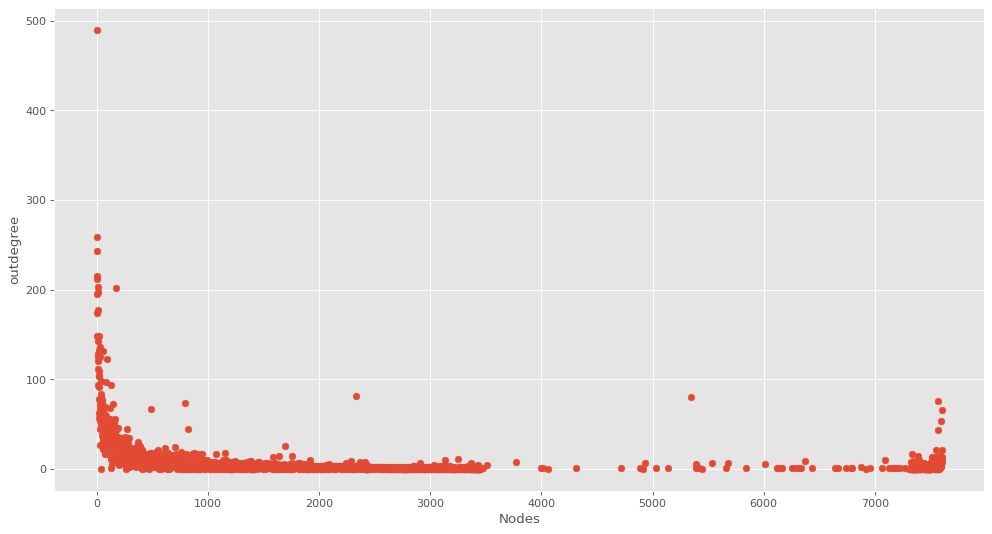

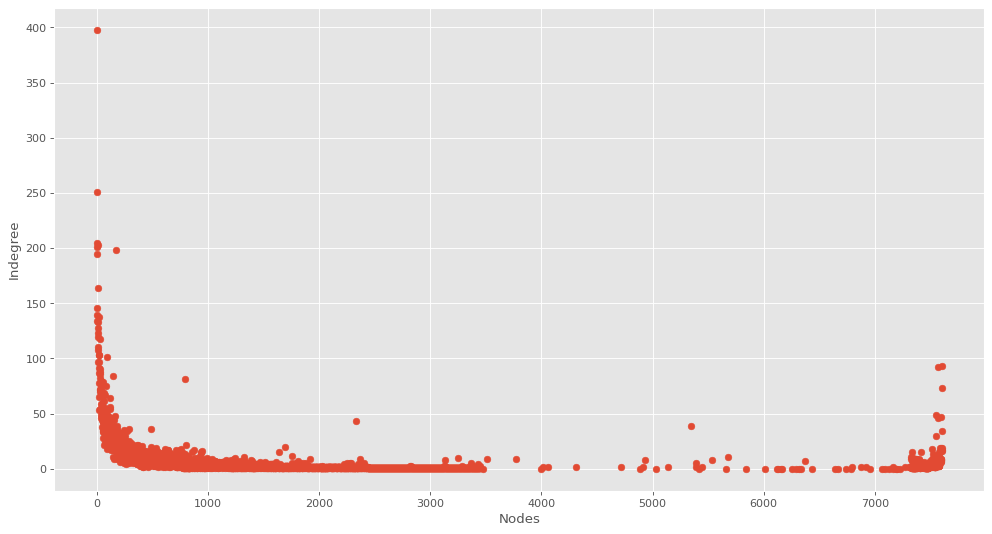

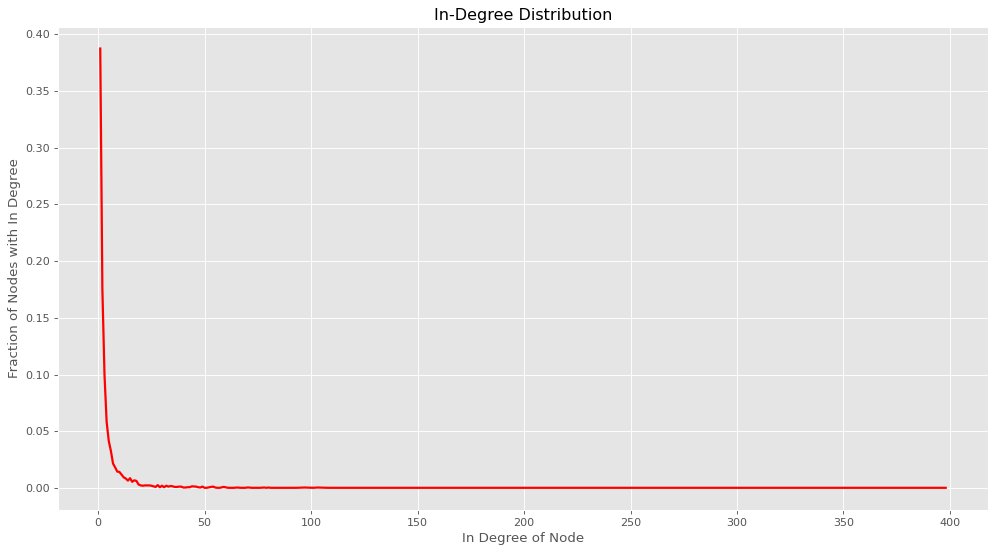

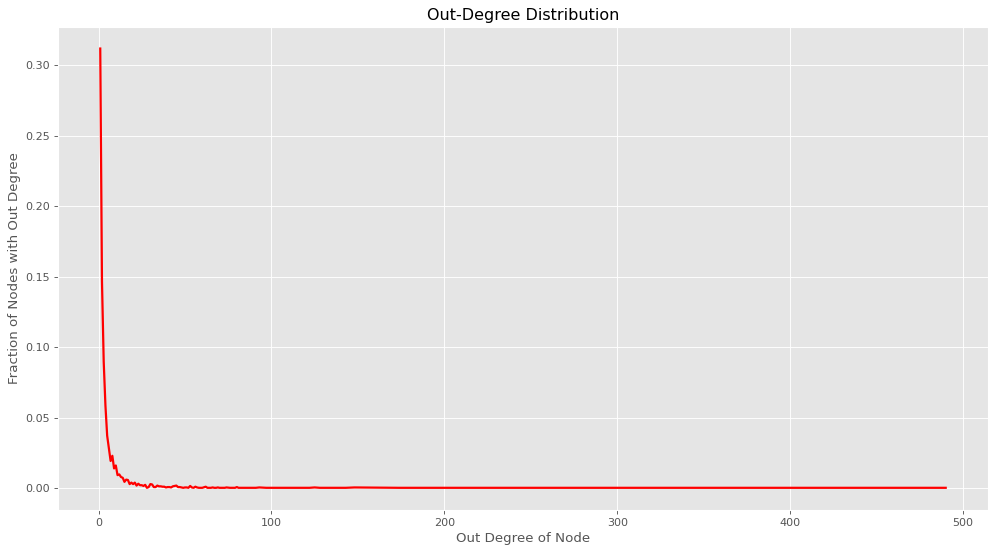

In [ ]:
G_edges = []
G_nodes = []
for i in range(0,dataset.shape[0]):
  G_edges.append([dataset[0][i],dataset[1][i]])
  G_nodes.append(dataset[0][i])
  G_nodes.append(dataset[1][i])
Unique_nodes = np.unique(G_nodes)
number_of_nodes = len(np.unique(G_nodes))
print("Nodes "+ str(number_of_nodes))
print("Edges "+ str(len(G_edges)))
print("edge_list "+str(G_edges))
#Adjacency matrix 
Adjacency_Matrix = np.zeros((number_of_nodes,number_of_nodes), dtype = 'int')
df_AdjMatrix = pd.DataFrame(data =Adjacency_Matrix, index=Unique_nodes,columns=Unique_nodes)
for i in range(0,len(G_edges)):
  df_AdjMatrix[G_edges[i][0]][G_edges[i][1]]=1
print("--------------- Adjacency Matrix -------------")
print(df_AdjMatrix)

#indegree outdegree calculation
in_degree_dict={}
out_degree_dict = {}
for i in df_AdjMatrix.index:
  in_degree_dict[i] = sum(df_AdjMatrix.loc[i])
  out_degree_dict[i] = sum(df_AdjMatrix[i])

print("Average in-degree "+str(sum(in_degree_dict.values())/number_of_nodes))
print("Average out-degree "+str(sum(out_degree_dict.values())/number_of_nodes))

max_indegree = max(in_degree_dict.values())
for key,value in in_degree_dict.items():
  if value == max_indegree:
    print("key: "+str(key)+" in_degree: "+str(value))
# out_degree_dict = dict(G.out_degree)
max_outdegree = max(out_degree_dict.values())
for key,value in out_degree_dict.items():
  if value == max_outdegree:
    print("key: "+str(key)+" out_degree: "+str(value))

density = len(G_edges)/(number_of_nodes*(number_of_nodes - 1))
print("Density "+ str(density))

plotDegree(in_degree_dict,out_degree_dict)



# Degree centrality - *Centrality Measure*

In [ ]:
def find_centrality(dd,l):
   s = 1.0 / (l - 1.0)
   centrality = {}
   for n,d in dd.items():
     centrality[n]=d*s
   return centrality

In [ ]:
idc = find_centrality(in_degree_dict,df_AdjMatrix.shape[0]) # for in degree
odc = find_centrality(out_degree_dict,df_AdjMatrix.shape[0]) #for out degree

In [ ]:
print(idc)
print(odc)

{1: 0.10523532522474881, 2: 0.054204124801692226, 3: 0.0663670015864622, 4: 0.05314648334214701, 5: 0.03860391327340032, 6: 0.03675304071919619, 7: 0.05156002115282919, 8: 0.035430988894764676, 9: 0.035166578529878374, 10: 0.04336329984135378, 11: 0.053675304071919616, 12: 0.033844526705446853, 13: 0.03146483342147012, 14: 0.025647805393971445, 15: 0.03252247488101533, 16: 0.02908514013749339, 17: 0.028556319407720784, 18: 0.020624008461131677, 19: 0.025647805393971445, 20: 0.014013749338974087, 21: 0.024061343204653623, 22: 0.027234267583289264, 23: 0.01718667371760973, 24: 0.023003701745108407, 25: 0.027234267583289264, 26: 0.03648863035430989, 27: 0.023268112109994712, 28: 0.014278159703860392, 29: 0.022739291380222106, 30: 0.023796932839767318, 31: 0.019037546271813855, 32: 0.01877313590692755, 33: 0.03120042305658382, 34: 0.01850872554204125, 35: 0.02168164992067689, 36: 0.02009518773135907, 37: 0.012162876784769964, 38: 0.01560021152829191, 39: 0.014013749338974087, 40: 0.0211528

In [ ]:
f = open('/content/drive/MyDrive/IR_A3/in_degree_centrality_measure.txt', 'w')
f.write(str(idc))
f.close()
f = open('/content/drive/MyDrive/IR_A3/out_degree_centrality_measure.txt', 'w')
f.write(str(odc))
f.close()

# Extra

In [ ]:
neighbours_of_node = {}
for i in range(adjacency_matrix.shape[0]):
  neighbours_of_node[i] = np.where(adjacency_matrix[i]>0)[0]


In [ ]:
#assume u node
scores = {}
for u in range(0,adjacency_matrix.shape[0]):
##getting n-1 value
  n_list=[]
  u_neigh = list(neighbours_of_node[u])
  if len(neighbours_of_node[3451]) ==0 :
    u_neigh = list(np.where(adjacency_matrix[:,u]>0)[0])
  n_list = u_neigh
  # print(len(n_list))
  count=0
  for node in n_list:
    count=count+1
    if node in neighbours_of_node:
      temp = neighbours_of_node[node]
      for i in temp:
        if i not in n_list:
          n_list.append(i)
  # print(count)
  deno = 0
  n=0
  for i in range(0,len(n_list)):
    ret = shortest_path_between_pairs(u,n_list[i],adjacency_matrix)
    if ret != False:
      # print(i)
      n=n+1
      deno = deno + ret
  score = n-1/deno
  scores[u] = score

# Clustering coefficient

In [ ]:
adjacency_matrix = df_AdjMatrix.to_numpy()
average_clustering_coeficient=0
cluster_coef = []
for node in range(adjacency_matrix.shape[0]):
  neighbors=np.where(adjacency_matrix[node]>0)[0]
  no_neigh=len(neighbors)
  edges_neigh=0
  if no_neigh>1:
    for i in neighbors:
      for j in neighbors:
        if i!=j and adjacency_matrix[i][j]>0:
          edges_neigh+=1
    edges_neigh/=2
    cluster_coef.append(2*edges_neigh/(no_neigh*(no_neigh-1)))
    average_clustering_coeficient+=(2*edges_neigh/(no_neigh*(no_neigh-1)))
  

average_clustering_coeficient/=adjacency_matrix.shape[0]
print("The Average Clustering Coefficient is ",average_clustering_coeficient)

The Average Clustering Coefficient is  0.15255370236987909


In [ ]:
fraction_of_nodes = {}
for i in range(0,len(cluster_coef)):
  coef = cluster_coef[i]

  if coef not in fraction_of_nodes:
    fraction_of_nodes[coef] = 1

  else:
    fraction_of_nodes[coef] += 1
for node in fraction_of_nodes:
    fraction_of_nodes[node] = fraction_of_nodes[node] / number_of_nodes

In [ ]:
cluster_coef

[0.008088300444286926,
 0.05282161645145863,
 0.034438247011952194,
 0.027860696517412936,
 0.067312234293812,
 0.05948284850380565,
 0.04171292624900872,
 0.06980136909437773,
 0.08276372750056961,
 0.04829417926081101,
 0.062137248207579376,
 0.0609621062992126,
 0.03482409913117789,
 0.06980240549828179,
 0.0785685725709716,
 0.038698915763135944,
 0.08290065766701281,
 0.03196803196803197,
 0.13036941580756015,
 0.15602322206095792,
 0.09377289377289377,
 0.08290500666285931,
 0.04278846153846154,
 0.1541031809676557,
 0.07681324957167333,
 0.07711837511900983,
 0.08124346917450366,
 0.03039832285115304,
 0.13638850889192886,
 0.07690387016229713,
 0.15434272300469484,
 0.15492957746478872,
 0.049253947559032306,
 0.13043478260869565,
 0.07497741644083107,
 0.13859649122807016,
 0.12560386473429952,
 0.07218001168907072,
 0.09760522496371553,
 0.07737341772151898,
 0.1164989939637827,
 0.12436708860759493,
 0.1277056277056277,
 0.07950680272108844,
 0.051201923076923075,
 0.0420408

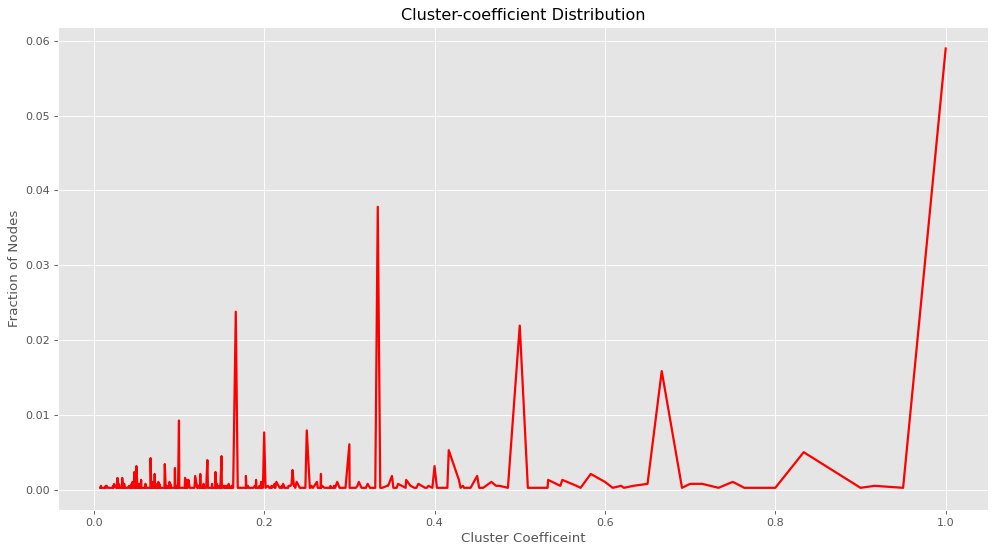

In [ ]:
style.use('ggplot')
fraction_of_nodes = dict(sorted(fraction_of_nodes.items()))
plt.figure(figsize=(15, 8), dpi=80)
plt.plot(list(fraction_of_nodes.keys())[1:], list(fraction_of_nodes.values())[1:], color = 'r', linewidth = 2)
plt.title('Cluster-coefficient Distribution')
plt.xlabel('Cluster Coefficeint')
plt.ylabel('Fraction of Nodes')
plt.show()

In [ ]:
def shortest_path_between_pairs(start,end,adjacency_matrix):
  if start==end:
    return 0
  else:
    visited=[0]*adjacency_matrix.shape[0]
    queue=[start]
    while (len(queue)>0): 
        next_node = queue.pop(0)
        neighbors = np.where(adjacency_matrix[next_node]>0)[0]
        if end in neighbors:
          for index in neighbors:
              if visited[index]==0:
                queue.append(index)
                visited[index]=visited[next_node]+1
              if index==end:
                  return (visited[index])
        else:
          return False


In [ ]:
G = nx.DiGraph()
for i in range(0,dataset.shape[0]):
  G.add_edge(dataset[0][i],dataset[1][i])

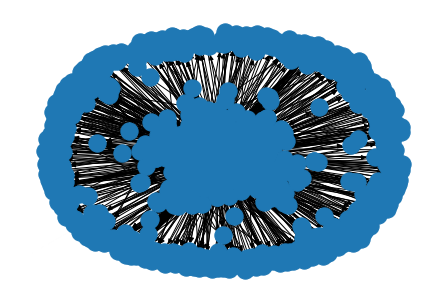

In [ ]:
nx.draw(G,cmap = plt.get_cmap('jet'))

# PageRank Score For Each Node

In [ ]:
# graph = nx.read_edgelist('/content/drive/MyDrive/IR_A3/graph.txt', create_using = nx.DiGraph())
pagerank = nx.pagerank(G)
    
#print("Page Rank Scores for Nodes: ", pagerank)
print("Page Rank Score: ")
print("Nodes: ", list(pagerank.keys())[:10])
print("Page Rank Scores: ", list(pagerank.values())[:10])

Page Rank Score: 
Nodes:  [7188, 1, 430, 3134, 3026, 3010, 804, 160, 95, 377]
Page Rank Scores:  [4.9739967085536536e-05, 0.016993099228405292, 0.00028751507169557397, 0.00011917626603597539, 7.937879011849084e-05, 7.937879011849084e-05, 0.00034797608896262324, 0.0004624121679665046, 0.002948042055839976, 0.0003107517366525091]


# Authority And Hub Score For Each Node

In [ ]:
hubs, authorities = nx.hits(G)

#print("Authority and Hub Scores for Nodes: ", authorities, hubs)

print("Nodes: ", list(hubs.keys())[:10])
print("Authority Scores: ", list(authorities.values())[:10])
print("Hub Scores: ", list(hubs.values())[:10])

Nodes:  [7188, 1, 430, 3134, 3026, 3010, 804, 160, 95, 377]
Authority Scores:  [0.0, 0.005881193763593962, 0.00012057995517272793, 0.0003912912178082634, 0.00013944393576446274, 0.00013944393576446274, 0.0005047716629344154, 0.00023950735377874916, 0.004673457088070035, 0.00014081457709522906]
Hub Scores:  [0.00015064556213535568, 0.0064088516365644315, 0.00035917665852851346, 0.00035052262848803324, 0.00015064556213535568, 0.00015064556213535568, 0.0005473505087191831, 0.00027205247224442743, 0.00544198036583848, 0.0001553104099808948]
